In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import sys
import os

In [2]:
url = "https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv"
df = pd.read_csv(url)
df.head()


,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
sys.path.append(os.path.join(os.getcwd(), 'scripts'))
from data_cleaner import DataCleaner
from plot_cases import PlotPerDate
from plot_cases import PlotTotalPerState
from plot_cases import DeathsPerDay

In [4]:
cleaner = DataCleaner(df)
df_clean = cleaner.clean()
df_clean.head()


,date,state,newCases,newDeaths
0,2020-02-25,SP,1,0
1,2020-02-25,TOTAL,1,0
2,2020-02-26,SP,0,0
3,2020-02-26,TOTAL,0,0
4,2020-02-27,SP,0,0


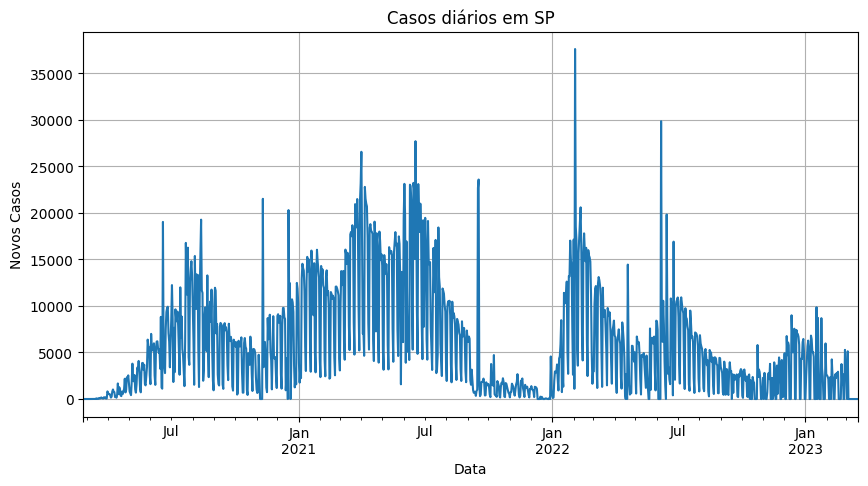

In [5]:
plot_sp = PlotPerDate(df, 'SP')
plot_sp.plot()


In [6]:
df['state'].value_counts()

state
SP       1118
TOTAL    1118
RJ       1109
BA       1108
ES       1108
DF       1107
AL       1106
MG       1106
RS       1104
GO       1102
PE       1102
PR       1102
RN       1102
SC       1102
AM       1101
MS       1100
SE       1100
CE       1098
AC       1097
PA       1096
PB       1096
TO       1096
PI       1095
AP       1094
MA       1094
MT       1094
RO       1094
RR       1093
Name: count, dtype: int64

In [7]:
#looking new cases


sp_df = df[df['state'] == 'SP']
total_sp_cases = sp_df['newCases'].sum()
print(total_sp_cases)

rj_df = df[df['state'] == 'RJ']
total_rj_cases = rj_df['newCases'].sum()
print(total_rj_cases)

6469442
2754359


In [8]:
#looking the deaths

sp_df_death = df[df['state'] == 'SP']
total_death_sp_cases = sp_df_death['newDeaths'].sum()
print(total_death_sp_cases)

rj_df_death = df[df['state'] == 'RJ']
total_death_rj_cases = rj_df_death['newDeaths'].sum()
print(total_death_rj_cases)

179039
76852


In [9]:
mean_cases = sp_df['newCases'].mean()
print(mean_cases)

5786.620751341681


In [10]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
sp_df = df[df['state'] == 'SP']
sp_df['month'] = sp_df['date'].dt.to_period('M')

month_cases = sp_df.groupby('month')['newCases'].sum()

print(month_cases)

month
2020-02         2
2020-03      2337
2020-04     26359
2020-05     81000
2020-06    171682
2020-07    260924
2020-08    262038
2020-09    181286
2020-10    130499
2020-11    125526
2020-12    220644
2021-01    315071
2021-02    264260
2021-03    428221
2021-04    433860
2021-05    368334
2021-06    455305
2021-07    330520
2021-08    204816
2021-09    103448
2021-10     39945
2021-11     33028
2021-12     17003
2022-01    192607
2022-02    368738
2022-03    240240
2022-04    131652
2022-05    122594
2022-06    206553
2022-07    200954
2022-08    111100
2022-09     65566
2022-10     47437
2022-11     46970
2022-12    124814
2023-01     97174
2023-02     48658
2023-03      8277
Freq: M, Name: newCases, dtype: int64


C:\Users\cutie\AppData\Local\Temp\ipykernel_14008\3707051750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_df['month'] = sp_df['date'].dt.to_period('M')


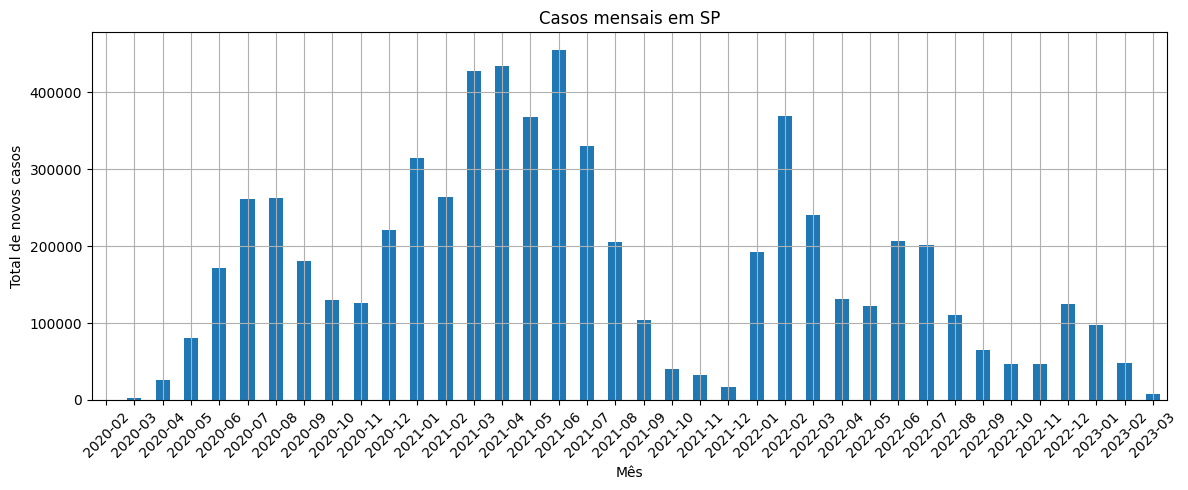

In [11]:
month_cases.plot(kind='bar', figsize=(12,5), title='Casos mensais em SP')
plt.xlabel('Mês')
plt.ylabel('Total de novos casos')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [12]:
df['month'] = df['date'].dt.to_period('M')

casos_estados = df.groupby(['state', 'month'])['newCases'].sum().reset_index()

print(casos_estados.head())

  state    month  newCases
0    AC  2020-03        42
1    AC  2020-04       362
2    AC  2020-05      5815
3    AC  2020-06      7034
4    AC  2020-07      6372


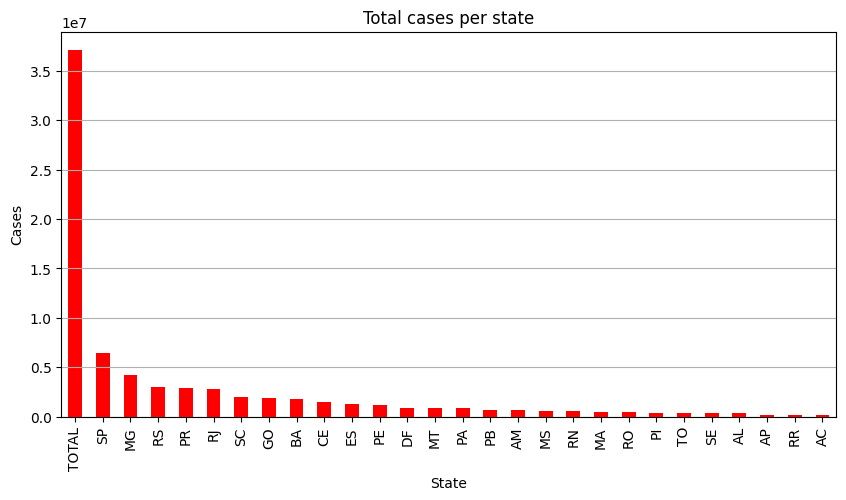

In [13]:
totalplot = PlotTotalPerState(df)
df_total_cases = totalplot.plotTotal()

e:\Analise Covid\scripts\plot_cases.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df['date'] = pd.to_datetime(state_df['date'])


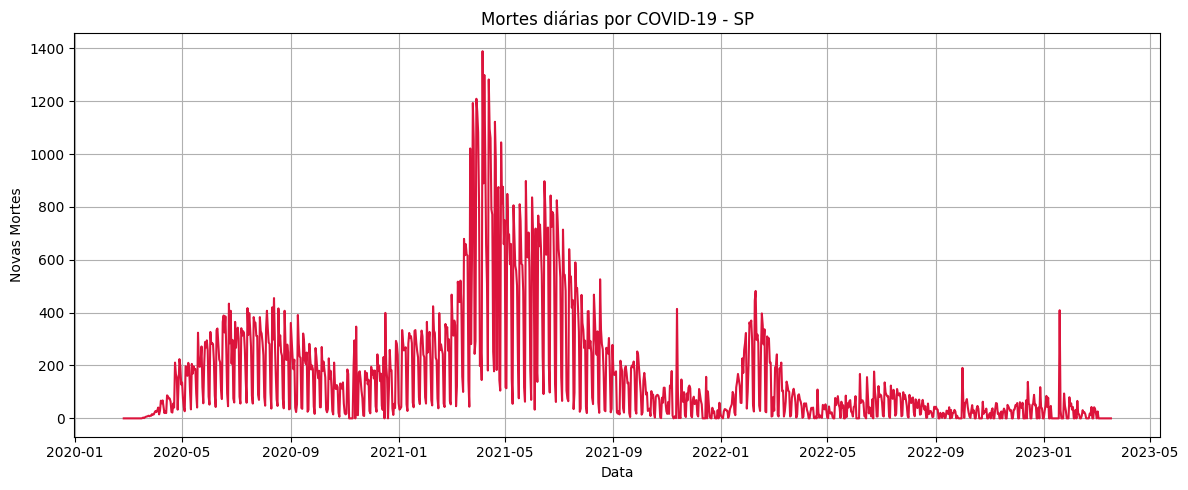

In [21]:
deaths = DeathsPerDay(df, 'SP')
deaths.deaths()